In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import japanize_matplotlib

In [3]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    bg_range=(0, 0),
    grid=True,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    start = None
    end = None
    if (bg_range[0] < bg_range[1]):
        for data in df.iterrows():
            norm = data[1]['norm']
            if bg_range[0] < norm and norm < bg_range[1]:
                if not start:
                    start = data[1]['time']
                end = data[1]['time']
            else:
                plt.axvspan(start, end, color='gray', alpha=0.2)
                start = None
                end = None

    plt.legend()

    plt.show()


In [4]:
file_path = "./logs/tokyo/"
df_mag = pd.read_csv(
    f"{file_path}Magnetometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

df_acc = pd.read_csv(
    f"{file_path}Accelerometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

df_gyro = pd.read_csv(
    f"{file_path}Gyroscope.csv",
    header=0,
    names=("time", "x", "y", "z")
)


In [5]:
df_acc['norm'] = np.linalg.norm(df_acc[['x', 'y', 'z']], axis=1)

df_gyro['x_rotate'] = np.cumsum(df_gyro['x']) / 400
df_gyro['y_rotate'] = np.cumsum(df_gyro['y']) / 400
df_gyro['z_rotate'] = np.cumsum(df_gyro['z']) / 400

/Users/satooru/.pyenv/versions/3.10.12/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


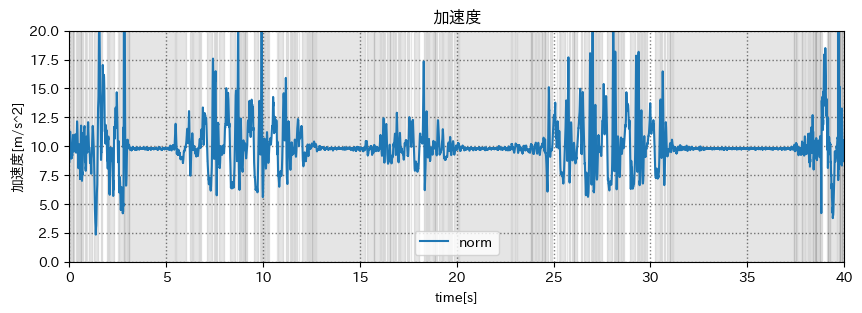

In [6]:
plot(
    df_acc,
    heads=[
        ("time", "norm"),
    ],
    title="加速度",
    xlabel="time[s]",
    ylabel="加速度[m/s^2]",
    xlim=(0, 40),
    ylim=(0, 20),
    bg_range=(0.9, 10.1),
    grid=True,
)


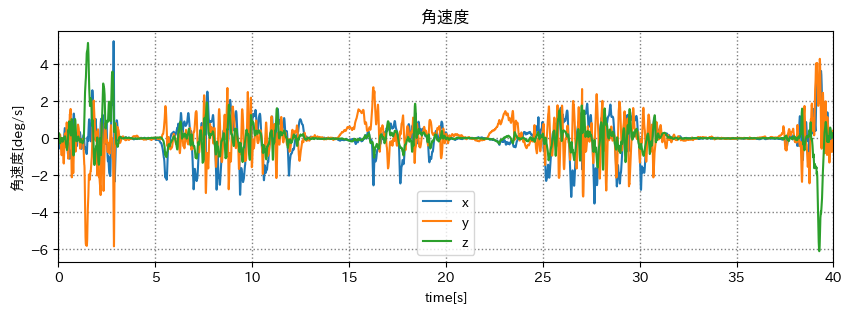

In [7]:
plot(
    df_gyro,
    heads=[
        ('time', 'x'),
        ('time', 'y'),
        ('time', 'z'),
    ],
    xlim=(0, 40),
    title="角速度",
    xlabel="time[s]",
    ylabel="角速度[deg/s]",
)


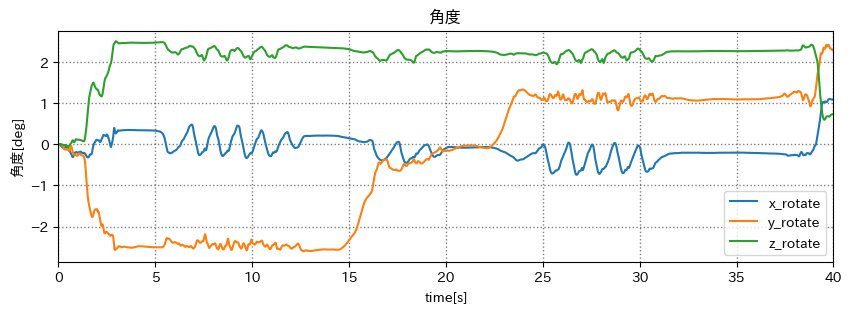

In [8]:
plot(
    df_gyro,
    heads=[
        ('time', 'x_rotate'),
        ('time', 'y_rotate'),
        ('time', 'z_rotate'),
    ],
    xlim=(0, 40),
    title="角度",
    xlabel="time[s]",
    ylabel="角度[deg]",
)
